# 4. ニューラルネットワークの学習

## 4.1 データから学習する

ニューラルネットワークの特徴は, データから学習できる点にある. データから学習するとは, 重みのパラメータの値をデータから自動で決定できるということであり, 層を深くしたディープラーニングになればパラメータの数が数億に及ぶこともあるため, 手作業で決める必要がないというのは大きな利点である.

### 4.1.1 データ駆動

機械学習はデータが命である. 機械学習による問題解決の場合には人の介入を極力避け, 集められたデータから答えを見つけようとする. さらに, ニューラルネットワークやディープラーニングでは, 従来の機械学習で使われた手法以上に, 人の介入を遠ざけることができるという重要な性質を持つ.

たとえば, 手書き数字が｢5｣であるかどうかを認識するプログラムを作りたい場合, 人が判断するのは簡単だが, それが可能なプログラムを設計してしようとすると難しい. 

そこでゼロから｢5｣と認識するアルゴリズムをデータを有効に活用して解決することを考える. その一つとして, 画像から特徴量を抽出して, その特徴量のパターンを機械学習の技術で学習する方法が考えられる. ここでいう特徴量とは, 入力データから本ぢ津的なデータを的確に抽出できるように設計された変換器を指す. 画像の特徴量は通常, ベクトルで記述され, そのベクトルに対して機械学習で使われる識別機で学習させることができる.

この機械学習によるアプローチでは, 集められたデータの中から機会が規則性を見つけ出すため, 人への負担は軽減されるが, 画像をベクトルに変換する際に使用した特徴量は, 人が設計したものであることに注意が必要である.

機械学習に対するアプローチを2つあげたが, それら2つのアプローチを図で示すと, 図4-2のようになる.

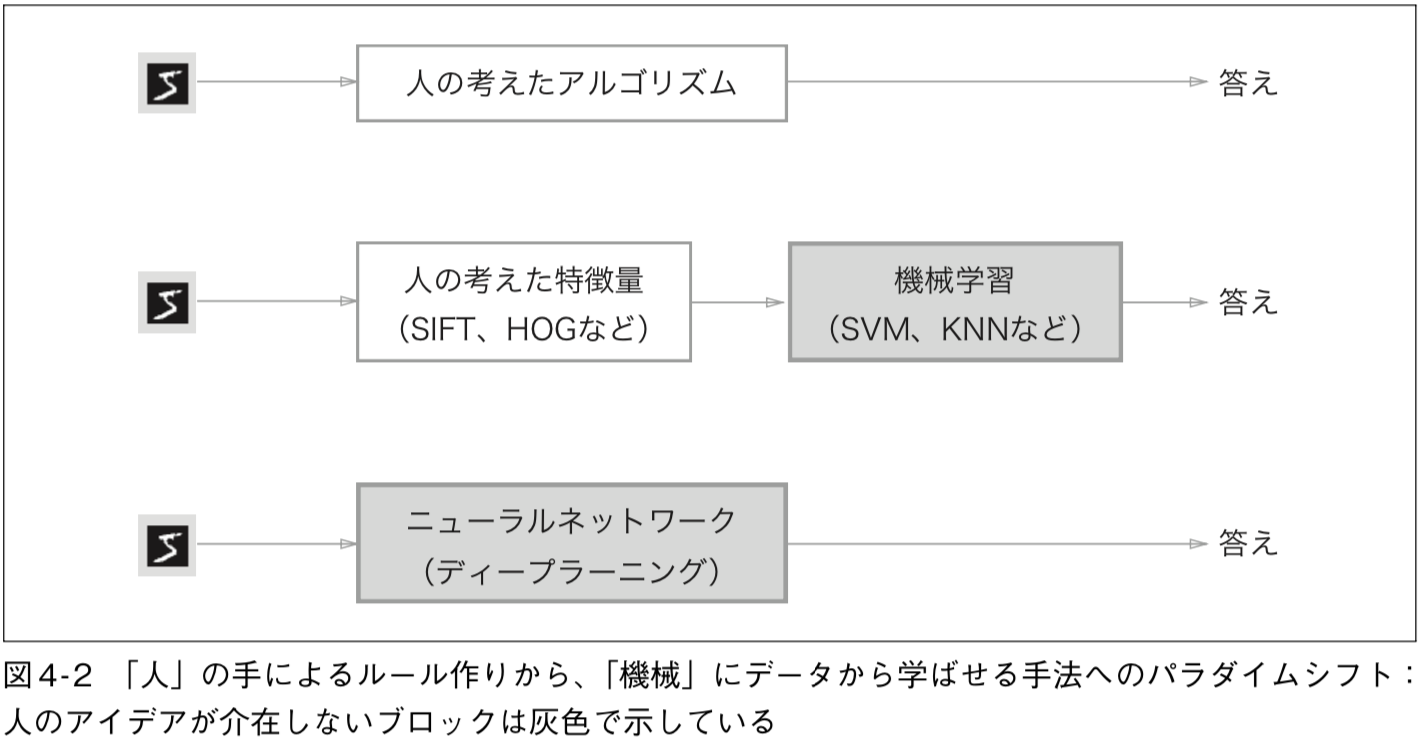

In [1]:
from IPython.display import Image, display
Image('images/fig4-2.png', width = 600)

図4-2のように, ニューラルネットワークは画像をそのまま学習するため, すべての問題を同じ流れで解くことができる. ニューラルネットワークは対象とする問題に関係なく, データをそのまま生データとして, "end-to-end(端から端まで : 生データから目的の結果まで)"で学習することができる.

### 4.1.2 訓練データとテストデータ

機械学習の問題では, 訓練データ(教師データ)とテストデータの2つのデータに分けて, 学習や実験などを行うのが一般的であり, 分けることで汎化能力を正しく評価する. ひとつのデータセットだけでパラメータの学習と評価を行うと, 正しい評価が行えない. そうすると, あるデータセットにはうまく対応できても, 他のデータセットには対応できない, といったことが起こる. あるデータセットだけに過度に対応した状態を過学習(overfitting)と言い, 過学習を避けることは, 機械学習の重要な課題である.

## 4.2 損失関数

損失関数には, 一般に, 2乗和誤差や交差エントロピー誤差などが用いられる.

### 4.2.1 2乗和誤差

2乗和誤差は次式で表される.

$$
    E = \frac{1}{2}\sum_{k}(y_k - t_k)^2 \tag{4.1}
$$

ここで, $y_k, t_k, k$はそれぞれ, ニューラルネットワークの出力, 教師データ, データの次元数を表す.

これをPythonで実装する.

In [2]:
def mean_squared_error(y, t):
        return 0.5 * np.sum((y-t)**2)

引数の y, t はNumPyの配列とする.

### 4.2.2 交差エントロピー誤差

交差エントロピー誤差は次式で表される.

$$
    E = - \sum_{k} t_k \log{y_k} \tag{4.2}
$$

ここで, $y_k, t_k, k$はそれぞれ, ニューラルネットワークの出力, 正解ラベルとする. また, $t_k$は, 正解ラベルとなるインデックスだけは1でその他は0であるとする. そのため, 式(4.2)は正解ラベルが1に対応する出力の自然対数を計算するだけになる.

これをPythonで実装する.

In [3]:
def cross_entropy_error1(y, t):
        delta = 1e-7
        return -np.sum(t * np.log(y + delta))

引数のy, tはNumPyの配列とする. np.logの計算時に微小なdeltaを足しているのは, np.log(0)のような計算が発生した場合に, 発散し計算が止まってしまうのを防ぐためである.

### 4.2.3 ミニバッチ学習

機械学習とは, 訓練データに対する損失関数を求め, その値をできるだけ小さくするようなパラメータを探し出すことであるから, 損失関数は, すべての訓練データを対象として求める必要がある. 

式(4.2)をすべてのデータに対する損失関数に適応させると, 次式のようになる.

$$
    E = - \frac{1}{N} \sum_{n} \sum_{k} t_{nk} \log{y_{nk}} \tag{4.3}
$$

ここで, データが$N$個あるとして, $t_{nk}$は$n$個目のデータの$k$次元目の値である. この式によって, データ1個あたりの平均の損失関数を求めることができる.

データの数が多いと, すべてのデータを対象にして損失関数の和を求めるには時間がかかりすぎる. そこで, データの中から一部を選び出し, その一部のデータを全体の近似として利用する. この選びだしたミニバッチごとに学習する手法をミニバッチ学習という.

ミニバッチ学習のために, 訓練データの中から指定された個数のデータをランダムに選び出すコードを記述する.

In [4]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

読み込んだデータの中からランダムに任意枚数だけ抜き出すためにnp.randam.choice()を使用する.

In [5]:
train_size = x_train.shape[0]
batch_size = 15 #バッチサイズ(枚数)指定
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(batch_mask)
print(x_batch.shape)
print(t_batch.shape)

[51608   701 24999  8604 36337 59271 40157 26665 12752 31375 42606 45675
 22858 48503 14654]
(15, 784)
(15, 10)


### 4.2.4 [バッチ対応版]交差エントロピー誤差の実装

バッチデータに対応した交差エントロピー誤差を, データがひとつの場合にも対応するように実装する.

In [6]:
def cross_entropy_error2(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size) # t.shape = (1, 784)
        y = y.reshape(1, y.size) # y.shape = (1, 10)
         
        batch_size = y.shape[0] #  if y.dim == 1: batch_size = 1
        return -np.sum(t * np.log(y)) / batch_size

また, 教師データがラベルとして与えられたとき(one-hotではなく｢2｣とか｢7｣とか), 交差エントロピー誤差は次のように実装できる.

In [7]:
def cross_entropy_error3(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
         
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

one-hot表現で t が0の要素は, 交差エントロピー誤差も0であるから, その計算は無視してもよく, 正解ラベルに対して, ニューラルネットワークの出力を得ることができたときのみ, 交差エントロピー誤差を計算する. そのため, tがone-hot表現のときは t * np.log(y) で計算していたところを, t がラベル表現の場合には, np.log(y[np.arrange(batch_size), t]) として同じ処理を行う. 

### 4.2.5 なぜ損失関数を設定するのか？

認識精度を指標にすると, パラメータの微分がほとんどの場所で0になってしまうため, ニューラルネットワークの性能を測る上で, 認識精度を指標にするべきでない. 認識精度は, 50%, 51%, 52%のように変化しても不連続な値をとって変化してしまう. そのため, パラメータを微小量変化させたとしても, 認識精度は変化せず, さらにパラメータを変化させると一気に変化する. 損失関数は, パラメータを微小量変化させれば, 同時に変化するため, 微分も0とならず, ニューラルネットワークの性能の指標として適している. 

## 4.3 数値微分

勾配法では, 勾配の情報を使って, 進む方向を決める.

### 4.3.1 微分

微分を定義に従って実装すると次のようになる.

In [8]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h

この関数は関数fと関数fへの引数xの2つの引数をとるが, この実装には改善点が2つある.

1つ目の問題点は, hを小さな値にしたかったためhに10e-50を用いているが, これでは丸め誤差が問題になる. 丸め誤差とは小さな範囲において数値が省略されることで, 最終的には計算結果に誤差が生じることである. たとえば, Pythonの場合,

In [9]:
np.float32(1e-50)

0.0

となる. この問題は, 微小なhとして$10^{-4}$程度の値を用いれば, 十分な結果が得られることが分かっているため, hを$10^{-4}$に置き換えることで解決できる.

2つ目の問題点は, 関数fの差分についてである, 上の実装では, x+h と x での関数fの差分(前方差分)を計算しているが, この計算には誤差が生じる. この数値微分の誤差を減らす工夫として, $(x + h)$と$(x - h)$での関数$f$の差分を計算する. この差分は, $x$を中心として, その前後の差分を計算することから, 中心差分という. 改善した実装を行うと次のようになる.

In [10]:
def numerical_diff(f, x):
        h = 1e-4
        return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 数値微分の例

前述した数値微分を使って, 次式を微分してみる.
$$
    y = 0.01x^2 + 0.1x \tag{4.4}
$$

In [11]:
def function_1(x):
        return 0.01*x**2 + 0.1*x

In [12]:
numerical_diff(function_1, 5)

0.1999999999990898

In [13]:
numerical_diff(function_1, 10)

0.2999999999986347

解析的な微分は, $f'(5) = 0.2$, $f'(10) = 0.3$であるから, 上の数値微分との誤差は非常に小さいことがわかる.

### 4.3.3 偏微分

次式について

$$
    f(x_0, x_1) = x_0^2 + x_1^2 \tag{4.5}
$$

Pythonで実装すると, 

In [14]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # または return np.sum(x**2)

ここでは引数にNumPy配列が入力されることを想定する. 変数が2つあるため, 偏微分を使っていく. $x_0 = 3, x_1 = 4$のとき, $x_0$についての偏微分と, $x_1$についての偏微分をそれぞれ定義すると,

In [15]:
def function_tmp1(x0): # x_0について
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [16]:
def function_tmp2(x1): # x_1について
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

偏微分は, 1変数の偏微分と同じで, ある場所の傾きを求める. 

## 4.4 勾配

$x_0 = 3, x_1 = 4$のとき, $(x_0, x_1)$の両方の偏微分をまとめて, $(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})$として計算することを考える. このように, すべての変数の偏微分をベクトルとしてまとめたものを勾配 (gradient) という. 実装は以下のようになる.

In [17]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x と同じ形状の配列を生成
        
    for idx in range(x.size):
        tmp_val = x[idx]
            
        # f(x+h) の計算
        x[idx] = tmp_val + h # x+h
        fxh1 = f(x) # function 関数に x+h を渡し、f(x+h) を求める
            
        # f(x-h) の計算 
        x[idx] = tmp_val - h # x-h
        fxh2 = f(x) # function 関数に x+h を渡し、f(x-h) を求める
    
        grad[idx] = (fxh1 - fxh2) / (2*h) 
        x[idx] = tmp_val # 値を元に戻す
        
    return grad

numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [18]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

偏微分の値も先程と同じようになる.

式(4.5)の勾配を勾配の値にマイナスを付けたベクトルで描画すると図4-9のようになる. 勾配は, 図のように向きを持ったベクトルとして図示され, 勾配は関数$f(x_0, x_1)$の最小値を指している. また, 最小値から遠いほど, ベクトルの大きさも大きくなっている.

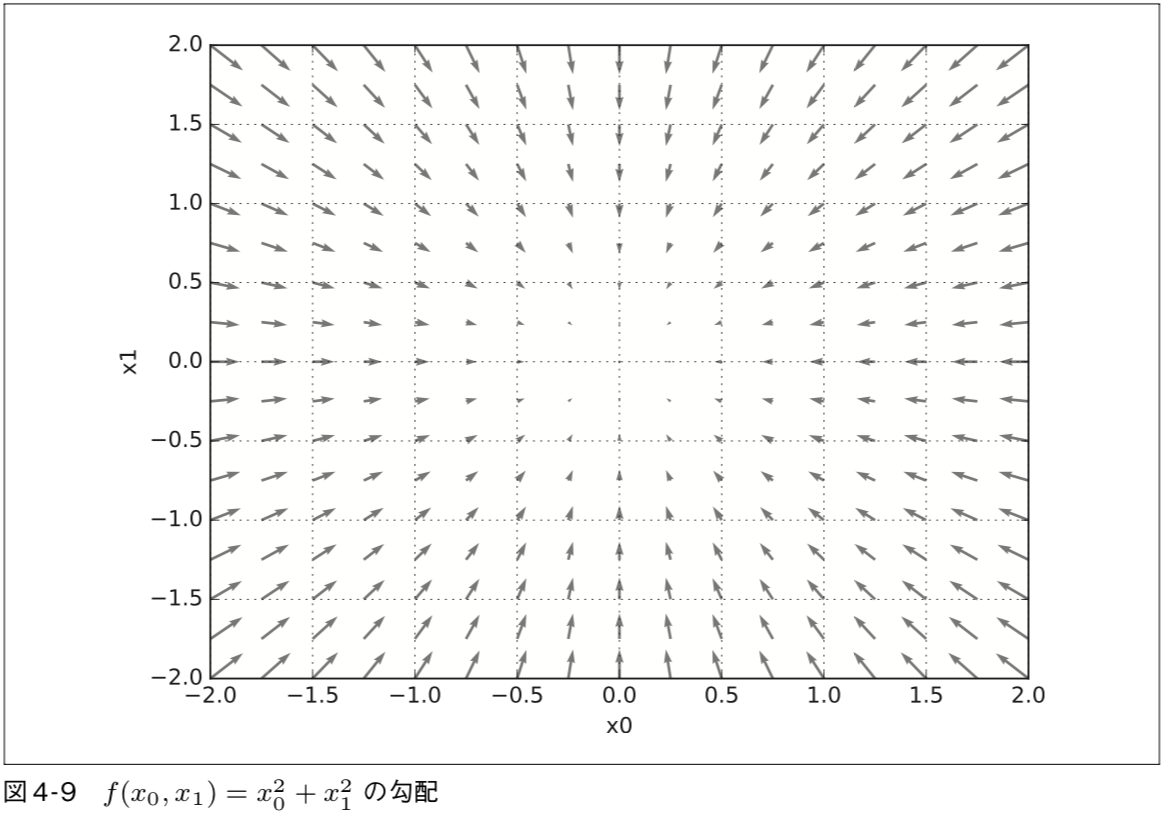

In [19]:
Image('images/fig4-9.png', width = 600)

図4-9では, 勾配は一番低い場所を指したが, 常にそうなるとは限らない. しかし, 勾配は各地点において, 低くなる方向をしめしているため, 勾配が示す方向は, 各場所において, 関数の値をもっとも小さくする方向である.

### 4.4.1 勾配法

機械学習の問題の多くは, 学習の際に最適なパラメータを探索するが, ニューラルネットワークも同様に最適なパラメータ(重みとバイアス)を学習時に見つけなければならない. ここで最適なパラメータというのは, 損失関数が最小値を取るときのパラメータの値であるが, 一般的に損失関数は複雑である. そこで, 勾配を利用して, 関数の最適化を行う手法が勾配法である.

勾配法では, 現在の場所から勾配方向に一定の距離だけ進み, 移動先でも勾配を求め, さらに勾配方向へ進む, というのを繰り返す. このように勾配方向へ繰り返し進むことで, 関数の値を徐々に減らしていく.

勾配法を数式で表すと, 次式のようになる.

$$
    x_0 = x_0 - \eta \frac{\partial f}{\partial x_0} \\
    x_1 = x_1 - \eta \frac{\partial f}{\partial x_1} \tag{4.6}    
$$

$\eta$は更新の量を表し, これをニューラルネットワークにおける学習率と呼ぶ. 学習率は, 1回の学習でどれだけ学習すべきか, どれだけパラメータを更新するかを決めている. 

式(4.6)は, １回の更新式を示しており, このステップを繰り返し行う. 1ステップごとに変数の値を更新していき, そのステップを何度か繰り返すことによって徐々に関数の値を減らしていく. ここでは, 変数の値が2つの場合を示しているが, 変数の数が増えても, 同じような式によって更新されることになる.

学習率の値は, 0.01や0.001など前もって何らかの値に決める必要がある. この値は, 大きすぎても小さすぎても良い場所にたどり着くことができないため, ニューラルネットワークの学習においては学習率の値を変更しながらうまく学習できているか確認作業を行うのが一般的である.

勾配降下法をPythonで実装する.

In [20]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x  = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

引数の f は最適化したい関数, init_x は初期値, lr はlearning rate (学習率), step_num は勾配法による繰り返しの数とする. 関数の勾配は, numerical_gradient(f, x) で求めて, その勾配に学習率を掛けた値で更新する処理を step_num で指定された回数繰り返す. 

この関数をうまく使えば, 関数の極小値を求めることができ, うまくいけば最小値を求めることができる.

例として, $f(x_0, x_1) = x_0^2 + x_1^2$の最小値を勾配法で求めてみる.

In [21]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

初期値を(-3.0, 4.0)として, 勾配法を使って最小値の探索を開始し, 最終的にはほぼ(0, 0)に近い値が得られた. 実際, 真の最小値は(0, 0)であるから, 勾配法にって正しい結果を得ることができたと言える. 勾配法による更新のプロセスを図示してみると, 徐々に原点(最小値)へ近づいていることがわかる.

In [22]:
import matplotlib.pyplot as plt

def gradient_descent_plot(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])  
lr=0.1
step_num = 20
x, x_history = gradient_descent_plot(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

<Figure size 640x480 with 1 Axes>

また, 学習率が大きすぎる, 小さすぎるケースについて試してみる.

In [23]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [24]:
init_x = np.array([-3.0, 4.0])
>>> gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

この結果のように, 学習率が大きすぎると, 大きな値へと発散し, 小さすぎると, ほとんど更新されずに終わってしまう. 適切な学習率の設定が重要だということがわかる.

### 4.4.2 ニューラルネットワークに対する勾配

ニューラルネットワークでは重みパラメータに関する損失関数の勾配を求める必要がある. たとえば, 形状が $2 \times 3$ で重み $\mathbf{W}$ だけをもつニューラルネットワークがあり, 損失関数を $L$ で表す場合を考える. この場合, 勾配は $\frac{\partial L}{\partial \mathbf{W}}$ と表すことができる. 数式で表すと次式のようになる.

$$
    \mathbf{W} =
         \left(\begin{array}
            ww_{11} & w_{21} & w_{31} \\
            w_{12} & w_{22} & w_{32} \\
        \end{array}\right) \\ 
    \frac{\partial L}{\partial \mathbf{W}} = 
         \left(\begin{array}
            w\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\
            \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{32}} \\
        \end{array}\right) \tag{4.7}
$$

$\frac{\partial L}{\partial \mathbf{W}}$ の各要素は, それぞれの要素に関する偏微分から構成される. たとえば, 1行1列目の要素である $\frac{\partial L}{\partial w_{11}}$ は, $w_{11}$ を少し変化させると損失関数 $L$ がどれだけ変化するかを表す.

簡単なニューラルネットワークを例にして, 実際に勾配を求める実装を行う. そのためにsimpleNetというクラスを実装する.

In [44]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # ガウス分布で初期化 
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

simpleNet というクラスは, 形状が $2 \times 3$ の重みパラメータをひとつだけインスタンス変数として持つ. また, 2 つのメソッドがあり, ひとつは予測するためのメソッド predict(x), もうひとつは損失関数の値を求めるためのメソッド loss(x, t) である. ここで, 引数の x には入力デー タ, t には正解ラベルが入力されるものとする. 試しに, この simpleNet を使ってみる.

In [45]:
net = simpleNet()
print(net.W) # 重みパラメータ

[[ 0.52394564  1.36646265 -0.91543412]
 [ 0.64777199  1.11792552  0.82108454]]


In [46]:
x = np.array([0.6, 0.9])
p= net.predict(x)
print(p)

[0.89736217 1.82601056 0.18971562]


In [47]:
np.argmax(p) # 最大値のインデックス

1

In [48]:
t = np.array([1, 0, 0]) # 正解ラベル
net.loss(x, t)

1.3922483064395363

続いて勾配を求めると,

In [49]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
dW

array([[-0.45089032,  0.37740879,  0.07348152],
       [-0.67633548,  0.56611319,  0.11022228]])

numerical_gradient(f, net.W) の引数 f は関数, x は関数 f への引数である. 結果は dWとなり, 形状が $2 \times 3$ の2次元配列となる. dWの中身を見ると, 例えば, $w_{11}$ はおよそ0.4ということが分かる. これは $w_ {11}$を $h$ だけ増やすと損失関数の値は $0.2h$ だけ増加するということを意味する. また, $w_{13}$ の値はおよそ0.5で, これは$w_{13}$を $h$ だけ増やすと損失関数の値は $0.5h$ だけ減少するということである. したがって, 損失関数を減らすという観点からは $w_{13}$はプラス方向へ更新し, $w_{11}$ はマイナス方向に更新するのが良いことが分かる. また, 更新の度合いについても, $w_{13}$ のほうがより大きく貢献することが分かる.

## 4.5 学習アルゴリズムの実装

ニューラルネットワークの学習の手順を確認する.

**前提**  
ニューラルネットワークは, 適応可能な重みとバイアスがあり, この重みとバイアスを訓練データに適応するように調整することを「学習」と呼ぶ. ニュー ラルネットワークの学習は次の 4 つの手順で行う. 

**ステップ1 (ミニバッチ)**  
訓練データの中からランダムに一部のデータを選び出す. その選ばれたデータをミニバッチといい, ここではそのミニバッチの損失関数を減らすことを目的とする.

**ステップ2 (勾配の算出)**  
ミニバッチの損失関数を減らすために, 各重みパラメータの勾配を求める. 勾配は, 損失関数の値を最も減らす方向を示す.

**ステップ3 (パラメータの更新)**  
重みパラメータを勾配方向に微小量だけ更新する.

**ステップ4 (繰り返す)**  
ステップ 1、ステップ 2、ステップ 3 を繰り返す.

この方法は, 勾配降下法によってパラメータを更新する方法であるが, ここで使用するデータはミニバッチとして無作為に選ばれたデータを使用していることから, 確率的勾配降下法(SGD : stochastic gradient descent)とよばれる. 

### 4.5.1 2層ニューラルネットワークにクラス

2層ニューラルネットワークを, ひとつのクラスとして実装する.

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1) # 引数とってきて比べる
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

このクラスで使用する重要な変数を表4-1に, メソッドを表4-2に整理して示す.

In [ ]:
Image('images/table4-1-2.png', width = 600)

TwoLayerNetクラスには, インスタンス変数として, paramsとgradsというディクショナリ変数がある. params変数には重みパラメータが格納されている. 下記のようにアクセスする.

In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape # (784, 100)
net.params['b1'].shape # (100,)
net.params['W2'].shape # (100, 10)
net.params['b2'].shape; # (10,)

ネットワークに必要なパラメータがすべて格納されており, これらが, 推論処理(フォワード処理)で使われる. 推論処理は次のように実行できる.

In [ ]:
x = np.random.rand(100, 784) # ダミーの入力データ(100 枚分) 
y = net.predict(x) 

grads変数には, params変数と対応するように各パラメータの勾配が格納される. たとえば, 次に示すように, numerical_gradient()メソッドを使って勾配を計算すると, grads変数に勾配情報が格納される.

In [ ]:
x = np.random.rand(100, 784) # ダミーの入力データ(100 枚分) 
t = np.random.rand(100, 10) # ダミーの正解ラベル(100 枚分)
grads = net.numerical_gradient(x, t) # 勾配を計算
grads['W1'].shape  # (784, 100)
grads['b1'].shape  # (100,)
grads['W2'].shape  # (100, 10)
grads['b2'].shape  # (10,)

続いて, TwoLayerNetのメソッドについて見ていく. __init__(self, input_size, hidden_size, output_size)メソッドは, クラスの初期化メソッド(クラスのインスタンスを生成するときに呼ばれるメソッド)であり, 引数は頭から順に, 入力層のニューロンの数, 隠れ層のニューロンの数, 出力層のニューロンの数を意味する. なお, 手書き数字認識を行う場合は, 入力画像サイズが $28 \times 28$ の計 784 個あり, 出力は 10 個のクラスになる. そのため, 引数の input_size=784, output_size=10 と指定し, 隠れ層の個数である hidden_size は適当な値を設定する. 

この初期化メソッドでは, 重みパラメータの初期化を行う. 重みパラ メータの初期値をどのような値に設定するかという問題は, ニューラルネットワー クの学習を成功させる上で重要である. ここでは, 重みはガウス分布に従う乱数で初期化し, バイ アスは 0 で初期化すると述べるにとどめておく.

predict(self, x) と accuracy(self, x, t) については, 前章のニューラルネットワークの推論処理の実装とほとんど同じ.

loss(self, x, t) については、損失関数の値を計算するメソッドであり, このメソッドの実装は、predict() の結果と正解ラベルを元に, 交差エントロピー誤差を求めるだけになる.
残る numerical_gradient(self, x, t) メソッドは, 各パラメータの勾配を計算する. これは数値微分によって, 各パラメータの損失関数に対する勾配を計算する.

### 4.5.2 ミニバッチ学習の実装

ニューラルネットワークの学習の実装は, ミニバッチ学習で行う. TwoLayerNetクラスを対象に, MNISTデータセットを使って学習を行う.
 
ミニバッチのサイズを 100 として, 毎回 60,000 個の訓練データからランダムに 100 個のデータ(画像データと正解ラベル)を抜き出している. その 100 個のミニバッチを対象に勾配を求め, SGDによってパラメータを更新していく. ここでは, 勾配法による更新の回数(iteration)を 10000 回として, 更新するごとに, 訓練データに対する損失関数を計算し, その値を配列に追加する. それをグラフにして示す.

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.ylim(0, 3.0)
plt.show()

学習の回数が進むにつれて, 損失関数の値が減っていくことが分かる. これは, 学習がうまくいっていることのサインであり, ニューラルネット ワークの重みパラメータが徐々にデータに適応していることを意味している.

### 4.5.3 テストデータで評価

学習を繰り返し行うことで損失関数の値が徐々に下がっていくことを確認できたが, この損失関数の値とは, 正確には「訓練データのミニバッチに対する損失関数」の値であり, 訓練データの損失関数の値が減ることは, ニューラルネットワークの学習がうまくいっていることのサインではあるが, この結果だけからは, 他のデータセットにも同じ程度の実力を発揮できるかどうかは定かではない.

ニューラルネットワークの学習では, 過学習を起こしていないことを確認するために, 訓練データ以外のデータを正しく認識できるかどうかを確認する必要がある. そもそもニューラルネットワークの学習で目標とすることは, 汎化能力を身につけることであるから, 訓練データに含まれないデータを使って評価しなければならない. そこで次の実装では, 学習を行う過程で, 定期的に訓練データとテストデータを対象に, 認識精度を記録することにする.

1エポックごとに, すべての訓練データとテストデータに対して認識精度を計算して, その結果の経過を記録する. グラフは次の図のようになる.

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

図では, 訓練データの認識精度を実線で示し, テストデータの認識精度を破線で示している. 見てのとおり, エポックが進むにつれて(学習が進むにつれて), 訓練データとテストデータを使って評価した認識精度は両方とも向上していることが分かる. また, その2つの認識精度には差がないことが分かる(その 2 つの線はほぼ重なっている). そのため, 今回の学習では過学習が起きていないことが分かる.

## 4.6 まとめ

本章では、ニューラルネットワークの学習について扱った. ニューラルネットワークが学習を行えるようにするために, 損失関数という「指標」を導入し, この損失関数を基準として, その値が最も小さくなる重みパラメータを探し出すことが, ニューラルネットワークの学習の目標である. また, できるだけ小さな損失関数の値を探し出すための手法として, 勾配法と呼ばれる, 関数の傾きを使った手法を扱った.